In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Gebruiker\Desktop\Data Analysis\Portfolio Projects\03. books_data.csv")
df.head()

,Unnamed: 0,Books,Authors,Language,First_Published,Sales_in_millions
0,0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,3,And Then There Were None,Agatha Christie,English,1939,100.0
4,4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0


In [19]:
# The second index is unnecessary

df.set_index(['Unnamed: 0'], inplace=True)
df

,Books,Authors,Language,First_Published,Sales_in_millions
Unnamed: 0,,,,,
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0
3,And Then There Were None,Agatha Christie,English,1939,100.0
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0
...,...,...,...,...,...
285,The No. 1 Ladies Detective Agency,Alexander McCall Smith,English,1999–present,15.0
286,Der Regenbogenfisch (Rainbow Fish),Marcus Pfister,German,1992–present,15.0
287,The Riftwar Cycle,Raymond E. Feist,English,1982–present,15.0


In [20]:
# Let's have a look at the data

print(df.shape)
print(df.info())

(290, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 289
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Books              290 non-null    object 
 1   Authors            290 non-null    object 
 2   Language           290 non-null    object 
 3   First_Published    290 non-null    object 
 4   Sales_in_millions  288 non-null    float64
dtypes: float64(1), object(4)
memory usage: 13.6+ KB
None


In [35]:
df.describe()

,Sales_in_millions
count,288.000000
mean,49.996875
std,64.684632
min,10.000000
25%,16.000000
50%,25.000000
75%,50.000000
max,600.000000


In [22]:
df.isnull().sum()

Books                0
Authors              0
Language             0
First_Published      0
Sales_in_millions    2
dtype: int64

In [26]:
df['Sales_in_millions'].unique()

array([200. , 120. , 100. ,  83. ,  80. ,  77. ,  65. ,  60. ,  50. ,
        45. ,  44. ,  43. ,  40. ,  39. ,  35. ,  37. ,  36.4,  36. ,
        33. ,  31.5,  31. ,  30. ,  29. ,  28. ,  26. ,  25. ,  24. ,
        23. ,  22.5,  21. ,  20. ,  18. ,  17. ,  16. ,  15.3,  15.2,
        15. ,  14. ,  13. ,  12.1,  12. ,  11. ,  10.5,  10.4,  10. ,
       600. , 400. , 300. , 275. , 260. , 250. , 201. , 180. , 172. ,
       160. , 150. , 130. , 129. , 125. ,  90. ,  85. ,  81. ,  75. ,
        70. ,  58. ,  55. ,  42. ,  36.5,  33.6,  32. ,  27. ,  24.4,
        23.7,  22. ,  21.5,   nan,  19. ])

<function matplotlib.pyplot.show(close=None, block=None)>

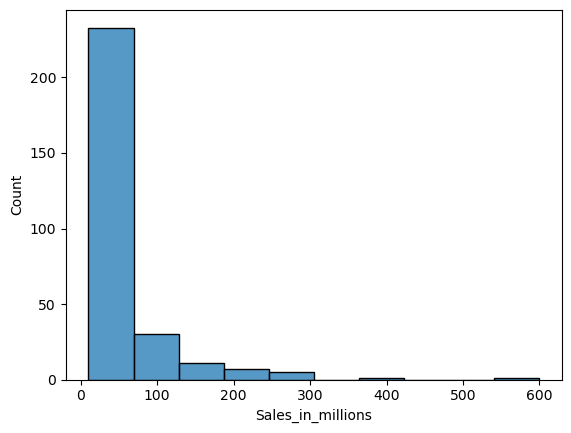

In [39]:
sns.histplot(df['Sales_in_millions'], bins=10)
plt.show

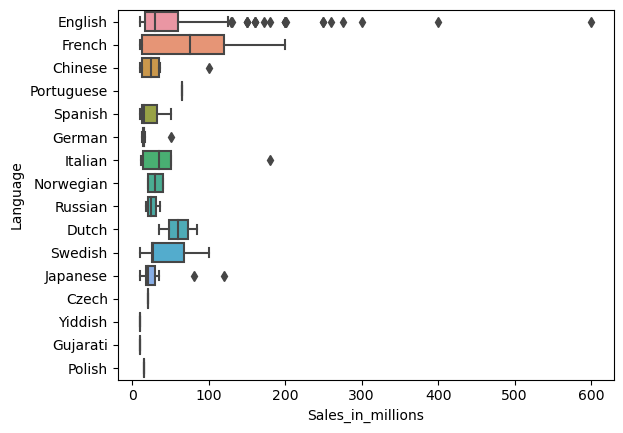

In [31]:
sns.boxplot(x='Sales_in_millions', y='Language', data=df)
plt.show()

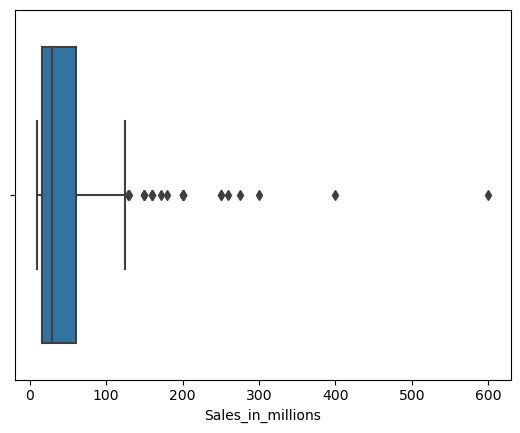

In [54]:
# Let's isolate the English books and look at the Sales_in_millions

df_eng = df.loc[(df['Language']=='English')]

sns.boxplot(x='Sales_in_millions', data=df_eng)
plt.show()

In [ ]:
# Which author sold the most books?
# Which author made the most Millions?